# A Preview of Data Science Tools

If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview some of the most important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment suggested at the beginning of this class, you can install the relevant packages with the following command:
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```

If you are using Google Colab there is a good chance that all of these packaes were already pre-installed.

Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [7]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# very similar to python's built-in range()
# need to be in numpy array format

[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [ ]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Compare this with the much more verbose Python-style list comprehension for the same result:

In [ ]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a two-dimensional 3x3 array:

In [4]:
%%timeit
L = [val ** 2 for val in range(1, 1000000)]

318 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
x = np.arange(1, 1000000)
x2 = x ** 2

2.2 ms ± 81.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [ ]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [ ]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [ ]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

## Pandas: Labeled Column-oriented Data

Pandas is a much newer package than NumPy, and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R, Excel, and related languages.
DataFrames in Pandas look something like this:

In [13]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'col2': [1, 2, 3, 4, 5, 6]})
df

,col1,col2
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [14]:
df['col1']

0    A
1    B
2    C
3    A
4    B
5    C
Name: col1, dtype: object

In [18]:
#identical way to draw data so long as the key has no spaces:
df.col1

0    A
1    B
2    C
3    A
4    B
5    C
Name: col1, dtype: object

In [19]:
type(df.col1)

pandas.core.series.Series

In [20]:
df.col1.values

array(['A', 'B', 'C', 'A', 'B', 'C'], dtype=object)

In [21]:
type(df.col1.values)

numpy.ndarray

In [22]:
df.col1.index

RangeIndex(start=0, stop=6, step=1)

Apply string operations across string entries:

In [ ]:
df['col1'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: col1, dtype: object

Apply aggregates across numerical entries:

In [ ]:
df['col2'].sum()

21

And, perhaps most importantly, do efficient database-style joins and groupings:

In [ ]:
df.groupby('col1').sum()

,col2
col1,
A,5
B,7
C,9


Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.

## Matplotlib MatLab-style scientific visualization

Matplotlib is one of the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let's create some data (as NumPy arrays, of course) and plot the results:

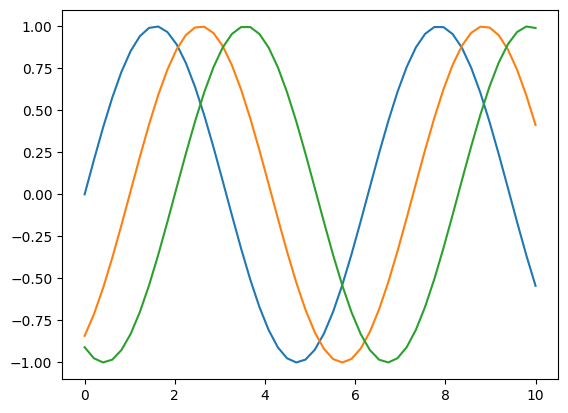

In [24]:
x = np.linspace(0, 10)  # range of 50 values from 0 to 10
plt.plot(x, np.sin(x - 0));         # plot as a line
plt.plot(x, np.sin(x - 1));     # plot as a line
plt.plot(x, np.sin(x - 2));     # plot as a line

### Matplotlib method on pandas DataFrame

It is also possible to create a plot directly from a pandas dataframe. For instance, below we create a chart off of our synthetic DataFrame `df`:

In [34]:
#np.random.randn?

np.random.randn(2, 2)

array([[ 0.79499409, -1.82948509],
       [-1.81582453,  0.70377016]])

In [39]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('7/1/2016', periods=1000), columns=list('ABCD'))
df
df = df.cumsum()

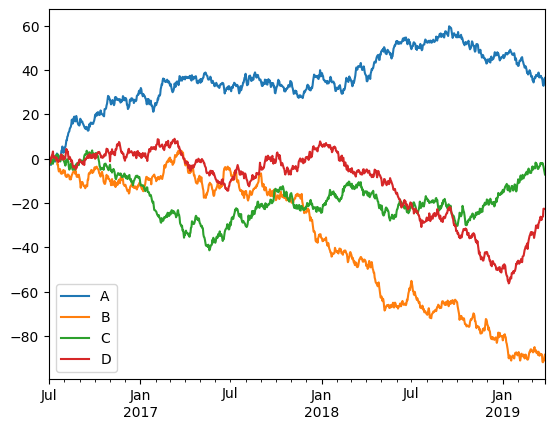

In [40]:
df.plot();

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html). We will come back to Matplotlib in the future classes.

## Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning, [Scikit-Image](http://scikit-image.org) for image analysis, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.